### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the lessons:

- Decision Tree I

- Decision Tree II

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/101P8Gi0K_HSn8UPijYQEdLFnRPUZmhvZ

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project100** format.

4. Now, write your code in the prescribed code cells.


---

#### Problem Statement

In this project, you are going to model an optimised decision tree classifier for the diagnostic prediction of whether or not a patient has diabetes and create an actual decision tree for the decision tree classifier.

---

### Dataset Description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The dataset includes 768 instances with 7 features and 1 target column (`Outcome`) which can be briefed as:

|Field|Description|
|---:|:---|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in $kg$ and height in $m^2$)|
|DiabetesPedigreeFunction|A function which scores likelihood of diabetes based on family history|
|Age|Age of the person|
|Outcome|0 - The person does not have diabetes|
||1 - The person has diabetes|

**Dataset Credits:** https://www.kaggle.com/uciml/pima-indians-diabetes-database


---

### List of Activities

**Activity 1:** Importing Modules and Reading Data

**Activity 2:** Building Decision Tree Classifier
  
**Activity 3:** Plot Decision Tree

**Activity 4:** Calculating Entropy

---

#### Activity 1: Importing Modules and Reading Data

Import the necessary Python modules along with the following modules:

 - `DecisionTreeClassifier`: To create the Decision Tree Classification Model.


 - `tree`: To plot a decision tree.

 - `metrics`: To retrieve information about nodes in a tree and their depth.

Read the data from a CSV file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

**Dataset Link:** https://s3-whjr-curriculum-uploads.whjr.online/b510b80d-2fd6-4c08-bfdf-2a24f733551d.csv


In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/b510b80d-2fd6-4c08-bfdf-2a24f733551d.csv')
# Print the first five records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---

#### Activity 2: Building Decision Tree Classifier

1. Split the DataFrame into train and test sets.

2. Create an object (say `dtree_clf`) of the `DecisionTreeClassifier()` constructor.

3. Inside the `DecisionTreeClassifier()` constructor, pass the following two parameters:

 - `criterion = entropy`: This parameter allows us to use the different attribute selection measures. Supported criteria are `gini` for the Gini index and `entropy` for the Information gain.

 - `max_depth = 3`: It determines the maximum depth of the tree.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `dtree_clf`.

6. Get the accuracy score on both train and test sets by calling the `accuracy_score()` function on the `metrics` object.



In [ ]:
# Create the feature and target DataFrames for training and testing the model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Remove the 'SkinThickness' column and the 'target' column from the feature columns
feature_columns = list(df.columns)
feature_columns.remove('SkinThickness')
feature_columns.remove('Outcome')
X = df[feature_columns]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
# Model the decision tree.
dtree_clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
dtree_clf.fit(X_train, y_train)
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

print(f"Accuracy on the train set: {metrics.accuracy_score(y_train, y_train_pred):.4f}\n")
print(f"Accuracy on the test set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Accuracy on the train set: 0.7728

Accuracy on the test set: 0.7835


**Q**: What is the accuracy score for the train set?

**A**: Accuracy on the train set is 0.7728 .

**Q**: What is the accuracy score for the test set?

**A**: Accuracy on the test set is 0.7835 .



---

#### Activity 3: Plot Decision Tree

Create an actual decision tree for the decision tree classifier created in **Activity 2: Building Decision Tree Classifier** using `graphviz` and `sklearn.tree` Python modules.




**Steps to follow to plot a decision tree:**

1. Import the following Python modules:

  ```python
  from sklearn.tree import export_graphviz
  from io import StringIO
  from IPython.display import Image  
  import pydotplus
  ```

2. Create an object of the `StringIO` class and store it in a `dot_data` variable. This will create an empty dot file.

3. Use the `export_graphviz()` function of the `sklearn.tree` module to export a decision tree in the DOT format. This function generates a `GraphViz` representation of the decision tree, which is then written into `out_file`. Write the contents of the `out_file` to the empty dot file created above.

4. Once exported, generate graphical renderings using the following steps:

  - Call the `getvalue()` function on the `dot_data` variable which is essentially an object of the `StringIO` class.

  - Pass the output of the above function as an input to the `graph_from_dot_data()` function of the `pydotplus` object. Store the output in a `graph` variable.

5. Now write the obtained decision tree to a PNG file by calling the `write_png()` function. Pass a string followed by `.png` as an input to this function to name your PNG file. For instance, you can name our PNG file as `'Diabetes_Tree.png'`.

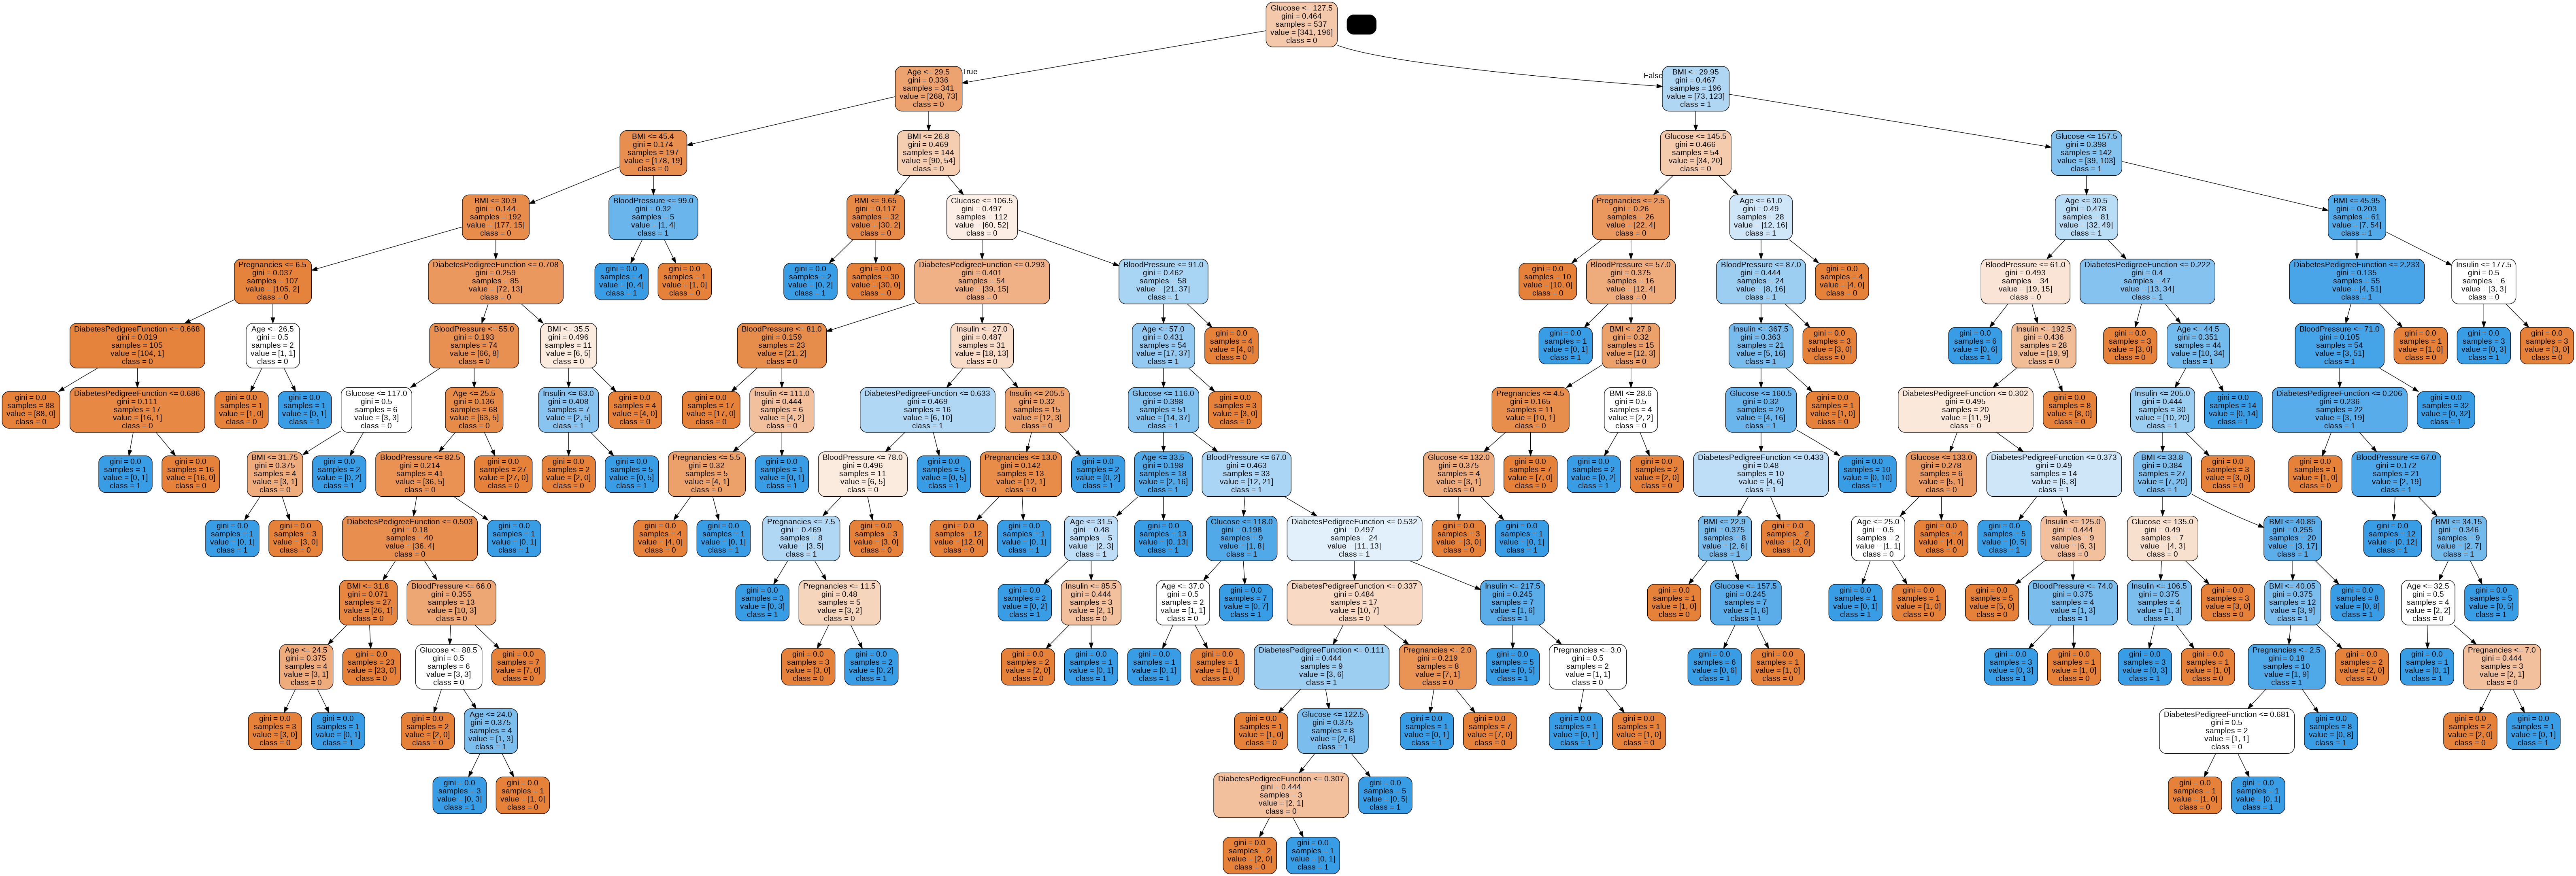

In [ ]:
# Create an actual decision tree for the decision tree classifier you have built.
# Import the required modules.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Create empty dot file.
dot_data = StringIO()

# Export decision tree in dot format.
export_graphviz(decision_tree = dtree_clf, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0','1']
                )
# Render the decision tree.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the decision tree to a png file.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabetes_Tree.png')
Image(graph.create_png())

**Q:** As per the obtained decision tree, which feature is at the root node and what is the condition to be verified at the root node?

**A:** The first Box from which it is splitted in several is considered as the root node and to verify the root node we should do before split and after split entroy formulae.


---

#### Activity 4: Calculating Entropy

Take a very small subset of the entire dataset containing the first 5 rows with `Glucose`, `Age` and `Outcome` columns.

<center><img src='https://i.imgur.com/CtGvohp.png' width=200></center>

Calculate the entropy value of the table using the formula given below,

\begin{align}
\text{Entropy} = -\sum_{i=1}^{N}p_{i}\times \log_{2}(p_{i})
\end{align}

Consider $p_1$ and $p_2$ as the probability of diabetic and non-diabetic persons respectively.



In [ ]:
# Calculate the entropy value of the table.
-((3/5)*np.log2(3/5) + (2/5) * np.log2(2/5))

0.9709505944546686

**Hint**:

- The probability of diabetic persons $p_1 = \frac{3}{5}$

- The probability of non-diabetic persons $p_2 = \frac{2}{5}$

**Question**: What is the Entropy value of the above table?

**Answer**: The Entropy value of the above table is `0.97`.

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project100**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project100** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---